In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("scaled_features.csv")

In [5]:
df.head()

,Unnamed: 0,OP_CARRIER_FL_NUM_z,DEP_TIME_z,DEP_DELAY_z,TAXI_OUT_z,WHEELS_OFF_z,WHEELS_ON_z,TAXI_IN_z,ARR_TIME_z,ARR_DELAY_z,...,OP_UNIQUE_CARRIER_OH_z,OP_UNIQUE_CARRIER_OO_z,OP_UNIQUE_CARRIER_UA_z,OP_UNIQUE_CARRIER_WN_z,OP_UNIQUE_CARRIER_YV_z,OP_UNIQUE_CARRIER_YX_z,IS_DELAYED_ARR_z,IS_DELAYED_DEP_z,IS_WEEKEND_z,TOTAL_DELAY_CAUSES_z
0,5776123,-0.446192,-0.162374,3.092152,-0.452036,-0.186083,0.387339,-0.463477,0.383734,2.688507,...,-0.200095,-0.356082,-0.298024,2.083878,-0.174762,-0.215010,1.680634,1.660421,-0.601758,3.947942
1,7266449,-0.679221,0.044572,-0.185569,-0.215183,0.020785,0.095831,-0.285011,0.092302,0.013821,...,-0.200095,-0.356082,-0.298024,2.083878,-0.174762,-0.215010,-0.595014,-0.602257,-0.601758,-0.304137
2,1600847,2.104869,0.231230,-0.083140,-0.688890,0.203316,0.142786,0.071920,0.146703,-0.053047,...,-0.200095,-0.356082,-0.298024,-0.479875,5.722061,-0.215010,-0.595014,-0.602257,1.661796,-0.304137
3,3534403,0.108508,0.486870,-0.083140,-0.925744,0.454803,0.518420,0.071920,0.519735,-0.922320,...,-0.200095,-0.356082,-0.298024,-0.479875,-0.174762,-0.215010,-0.595014,-0.602257,-0.601758,-0.304137
4,2528066,1.036724,-0.312512,-0.697713,-0.807317,-0.261124,-0.246544,0.071920,-0.239930,-1.524124,...,-0.200095,-0.356082,-0.298024,-0.479875,-0.174762,4.650942,-0.595014,-0.602257,-0.601758,-0.304137


In [8]:
def categorize_delay(row):
    if row['TOTAL_DELAY_CAUSES_z'] == 0:
        return 'No Delay'
    elif row['TOTAL_DELAY_CAUSES_z'] == 1:
        return 'Single Cause Delay'
    elif row['TOTAL_DELAY_CAUSES_z'] > 1:
        return 'Multiple Causes Delay'
    else:
        return 'Unknown'


In [10]:
df['DELAY_CATEGORY'] = df.apply(categorize_delay, axis=1)

In [11]:
df[['TOTAL_DELAY_CAUSES_z', 'DELAY_CATEGORY']].head()


,TOTAL_DELAY_CAUSES_z,DELAY_CATEGORY
0,3.947942,Multiple Causes Delay
1,-0.304137,Unknown
2,-0.304137,Unknown
3,-0.304137,Unknown
4,-0.304137,Unknown


In [21]:
print(df[delay_cols].corr())


             DEP_DELAY_z  ARR_DELAY_z  TAXI_OUT_z  TAXI_IN_z
DEP_DELAY_z     1.000000     0.619122    0.002042  -0.065005
ARR_DELAY_z     0.619122     1.000000    0.396094   0.183575
TAXI_OUT_z      0.002042     0.396094    1.000000   0.003669
TAXI_IN_z      -0.065005     0.183575    0.003669   1.000000


In [12]:
df['DELAY_CATEGORY'].value_counts()


DELAY_CATEGORY
Unknown                  271477
Multiple Causes Delay     28523
Name: count, dtype: int64

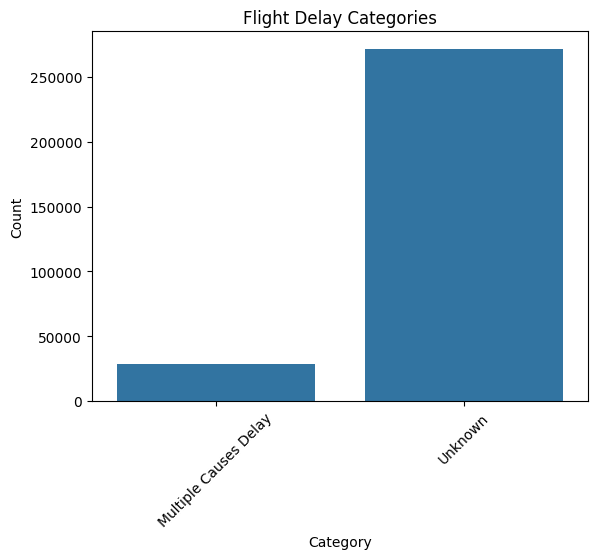

In [13]:
sns.countplot(x='DELAY_CATEGORY', data=df)
plt.title('Flight Delay Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [19]:
print(df.groupby('IS_WEEKEND_z')[delay_cols].mean())


              DEP_DELAY_z  ARR_DELAY_z  TAXI_OUT_z  TAXI_IN_z
IS_WEEKEND_z                                                 
-0.601758        0.005341     0.016889    0.020172  -0.001438
 1.661796       -0.014751    -0.046639   -0.055706   0.003972


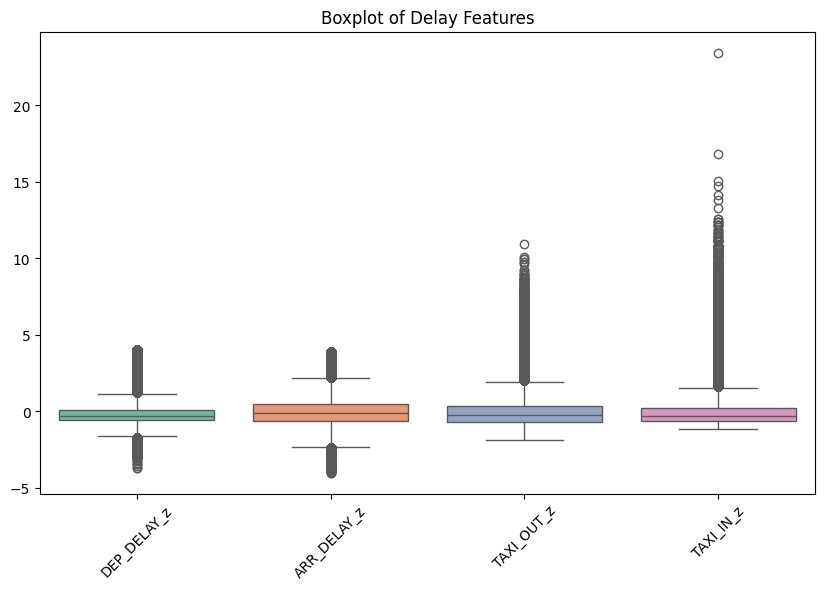

In [14]:
delay_cols = ['DEP_DELAY_z', 'ARR_DELAY_z', 'TAXI_OUT_z', 'TAXI_IN_z']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[delay_cols], palette='Set2')
plt.title('Boxplot of Delay Features')
plt.xticks(rotation=45)
plt.show()


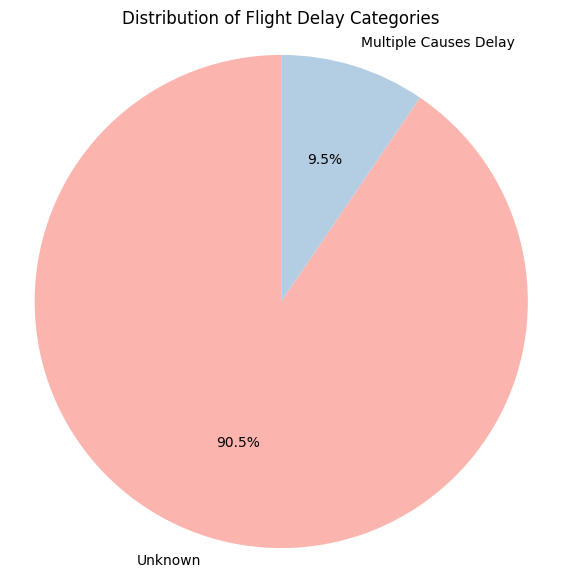

In [16]:
delay_counts = df['DELAY_CATEGORY'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(delay_counts, labels=delay_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Flight Delay Categories')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

In [17]:
output_file = "updated_flight_delays.csv"
df.to_csv(output_file, index=False)

print(f"✅ File saved as {output_file}")

✅ File saved as updated_flight_delays.csv


In [18]:
print(df.head())
print(df[delay_cols].describe())
print(df[delay_cols].isnull().sum())


   Unnamed: 0  OP_CARRIER_FL_NUM_z  DEP_TIME_z  DEP_DELAY_z  TAXI_OUT_z  \
0     5776123            -0.446192   -0.162374     3.092152   -0.452036   
1     7266449            -0.679221    0.044572    -0.185569   -0.215183   
2     1600847             2.104869    0.231230    -0.083140   -0.688890   
3     3534403             0.108508    0.486870    -0.083140   -0.925744   
4     2528066             1.036724   -0.312512    -0.697713   -0.807317   

   WHEELS_OFF_z  WHEELS_ON_z  TAXI_IN_z  ARR_TIME_z  ARR_DELAY_z  ...  \
0     -0.186083     0.387339  -0.463477    0.383734     2.688507  ...   
1      0.020785     0.095831  -0.285011    0.092302     0.013821  ...   
2      0.203316     0.142786   0.071920    0.146703    -0.053047  ...   
3      0.454803     0.518420   0.071920    0.519735    -0.922320  ...   
4     -0.261124    -0.246544   0.071920   -0.239930    -1.524124  ...   

   OP_UNIQUE_CARRIER_OO_z  OP_UNIQUE_CARRIER_UA_z  OP_UNIQUE_CARRIER_WN_z  \
0               -0.356082        